## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
<hr>

## Tutorial 7: PCA
## Objectives
### $\bullet$ Code the PCA algorithm
### $\bullet$ Explore PCA as visualization tool
### $\bullet$ Apply PCA for data generation
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# computational time
import time

# import mat data
import scipy.io

# dynamic 3D rotations:
%matplotlib notebook 
# no 3D rotations but cleaner images:
#%matplotlib inline    
import matplotlib.pyplot as plt

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# high definition picture
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')

# visualize 2D images
import scipy.ndimage


## 1.1 Load dataset
<hr>
The data features are $x_i=(x_{i(1)},x_{i(2)})$. <br>

Plot the data points.<br>

In [11]:
# Training set
data = np.loadtxt('data/pca01.txt', delimiter=',')
print(data.shape)

(50, 2)


<IPython.core.display.Javascript object>


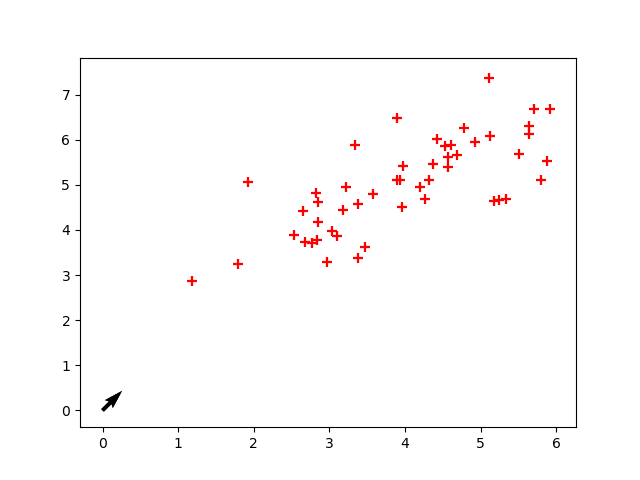

In [4]:
#YOUR CODE HERE

# plot
    
plt.scatter(data[:,0], data[:,1], s=60, c='r', marker='+', label='data')


## 1.2 Z-scoring 
<hr>

Apply the z-scoring normalization to the data. Plot the data points.

In [10]:
X = data
print('mean before=',np.mean(X,axis=0))
print('std before=',np.std(X,axis=0))

#YOUR CODE HERE
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)

print('mean after=',np.mean(X,axis=0))
print('std after=',np.std(X,axis=0))


mean before= [-0.42168134  0.42168134]
std before= [0.96627964 0.84301444]
mean after= [-5.32907052e-17  0.00000000e+00]
std after= [1. 1.]


## 1.3 Co-variance matrix
<hr>

Definition: The $d \times d$ co-variance matrix is defined as:

$$
\Sigma \ =  \ \frac{1}{n} \sum_{i=1}^n x_ix_i^T \ = \  \frac{1}{n} X^TX
$$

with the $n \times d$ data matrix:

$$
X = 
\left[ 
\begin{array}{cccc}
- x_1^T -
\\ 
 \vdots
 \\
- x_n^T -
\end{array} 
\right]
$$

The data variance along j-dim is:
$$
\Sigma_{jj} = \sum_{i=1}^n x_{i(j)}^2
$$

The data co-variance along j-dim and l-dim is :
$$
\Sigma_{jl} = \sum_{i=1}^n x_{i(j)}x_{i(l)}
$$


Compute the co-variance matrix $\Sigma$.


In [13]:
#YOUR CODE HERE
n = data.shape[0]
Sigma = X.T.dot(X) / n


## 1.4 Principal directions
<hr>

The principal directions $U=[u_1,u_2]$ are given by the eigenvalue decomposition (EVD) of the co-variance matrix $\Sigma$:

$$
\Sigma = U S U^T
$$

Compute and plot the principal directions of the data points.

Hint: You may use `plt.quiver` to draw arrows.

In [15]:
def EVD(X):
    s, U = np.linalg.eig(X)
    idx = s.argsort()[::-1] # decreasing order
    return s[idx], U[:,idx]

In [48]:
#YOUR CODE HERE
s, U = EVD(Sigma)
print(U.shape)
print(U)
print(s)

u1 = s[0]* U[:,0]
print(u1)
u2 = s[1]* U[:,1]
print(u2)

(2, 2)
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.73553 0.26447]
[1.22720503 1.22720503]
[-0.18700853  0.18700853]


<IPython.core.display.Javascript object>


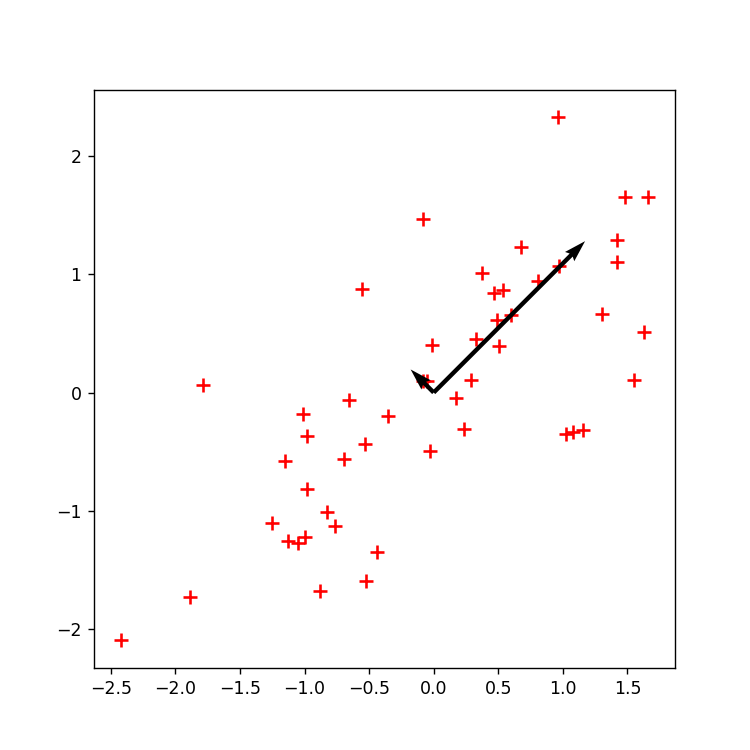

In [49]:

plt.figure(2,figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=60, c='r', marker='+', label='data')
plt.quiver(0,0,u1[0],u1[1], scale=1, units='xy')
plt.quiver(0,0,u2[0],u2[1], scale=1, units='xy')
plt.show()


## 1.5 Main principal directions
<hr>

Data variations are captured by each principal direction. A natural rule is to select the first k principal directions that capture e.g. 85% of total variance:
$$
\frac{\sum_{l=1}^k S_{ll}}{\sum_{l=1}^d S_{ll}} \geq 0.85
$$

How many principal directions do we need to capture 85% of the total data variance?

In [68]:
#YOUR CODE HERE
def select_k(s):
    tot_var = np.sum(s)
    k = 0
    perc = 0.0
    while perc<0.85:
        perc = np.sum(s[:k])/tot_var
        #print(perc)
        k += 1
    return k-1

k = select_k(s)
print(k)


1


## 2.1 Load new dataset
<hr>

The data features are composed of $d$=3465 features, that is $x_i=(x_{i(1)},...,x_{i(3465)})$. <br>

In [59]:
# Yale Faces
mat = scipy.io.loadmat('data/pca02_yale_faces.mat')
X = mat['X']
print(X.shape)

(27, 3465)


## 2.2 Visualization
<hr>

The data are vectorized images. It is possible to visualize them by reshaping the 3465-D vectors into 55x63 matrices.

Let us plot some images.

In [60]:
n = X.shape[0]
d = X.shape[1]
Nx = 55
Ny = 63

<IPython.core.display.Javascript object>


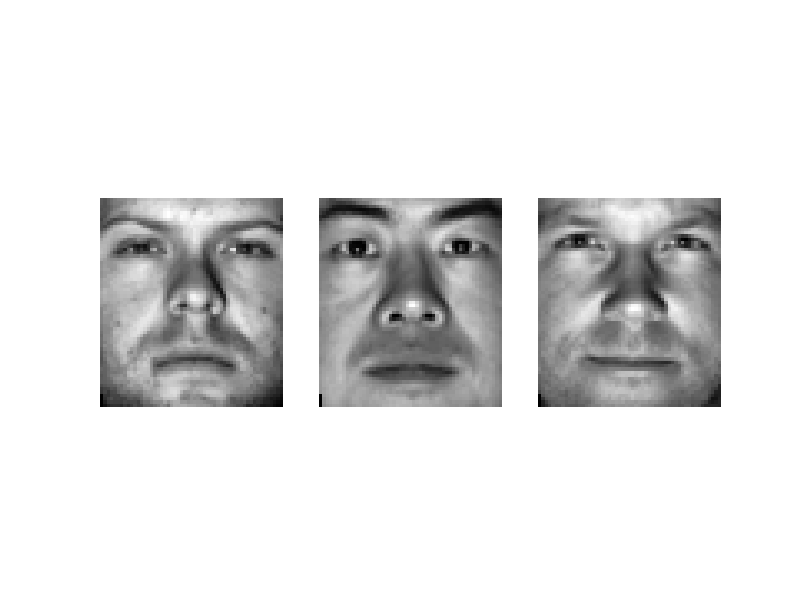

In [61]:
# Plot some images
plt.figure(10)
rotated_img = scipy.ndimage.rotate(np.reshape(X[0,:],[Nx,Ny]), -90)
plt.subplot(131).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[10,:],[Nx,Ny]), -90)
plt.subplot(132).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[20,:],[Nx,Ny]), -90)
plt.subplot(133).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
plt.show()

## 2.3 Principal directions
<hr>

Compute the principal directions. Plot the largest 15 data variance $S_{ll}, \ l=1,..,15$, along the principal directions $u_l, \ l=1,..,15$.

In [72]:
#YOUR CODE HERE
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)
Sigma = X.T.dot(X) / n
s, U = EVD(Sigma)


<IPython.core.display.Javascript object>


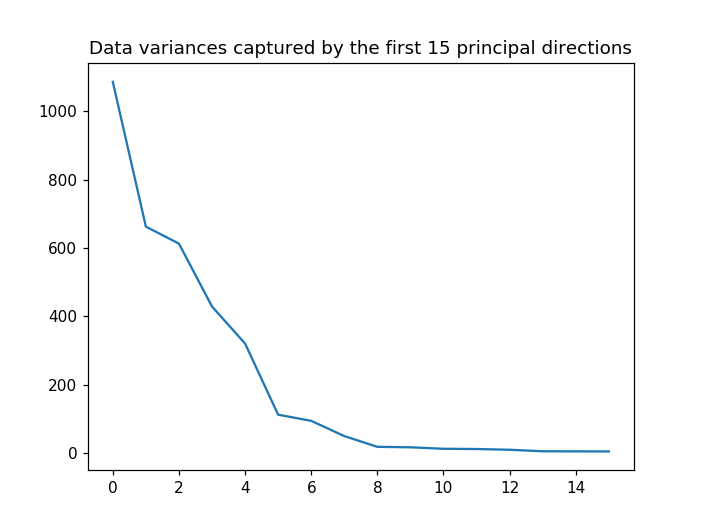

Text(0.5, 1.0, 'Data variances captured by the first 15 principal directions')

In [73]:
# Plot
plt.figure(11)
plt.plot(s[:16])
plt.title('Data variances captured by the first 15 principal directions')


## 2.4 Main principal directions
<hr>

How many principal directions do we need to capture 95% of the total data variance?

In [74]:
#YOUR CODE HERE
def select_k(s):
    tot_var = np.sum(s)
    k = 0
    perc = 0.0
    while perc<0.95:
        perc = np.sum(s[:k])/tot_var
        #print(perc)
        k += 1
    return k-1

k = select_k(s)
print(k)


7


## 2.5 PCA as visualization tool [Bonus]
<hr>


In [75]:
# Indicator vector of three classes of faces
C = mat['Cgt'].squeeze()
print(C.shape)

(27,)


(27, 3465) (3465, 3465) (27, 3465)


<IPython.core.display.Javascript object>


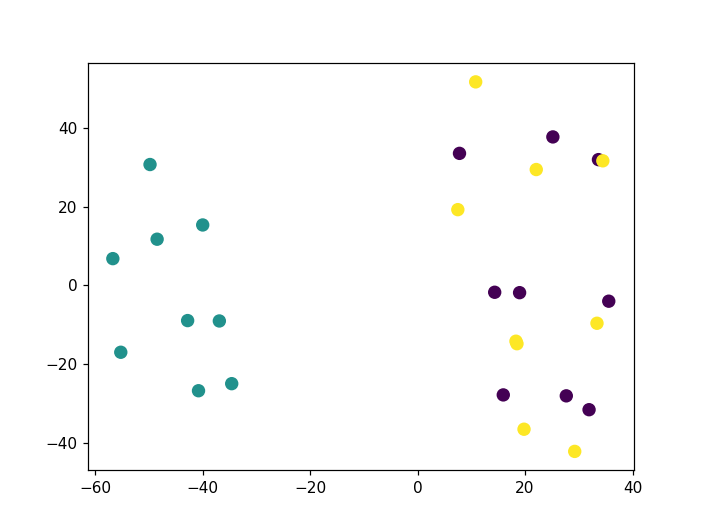

In [76]:
# Principal components
PC = X.dot(U)
print(X.shape,U.shape,PC.shape)


# 2D Plot
plt.figure(12)
plt.scatter(PC[:,0], PC[:,1], s=60*np.ones(27), c=C ) 
plt.show()


<IPython.core.display.Javascript object>


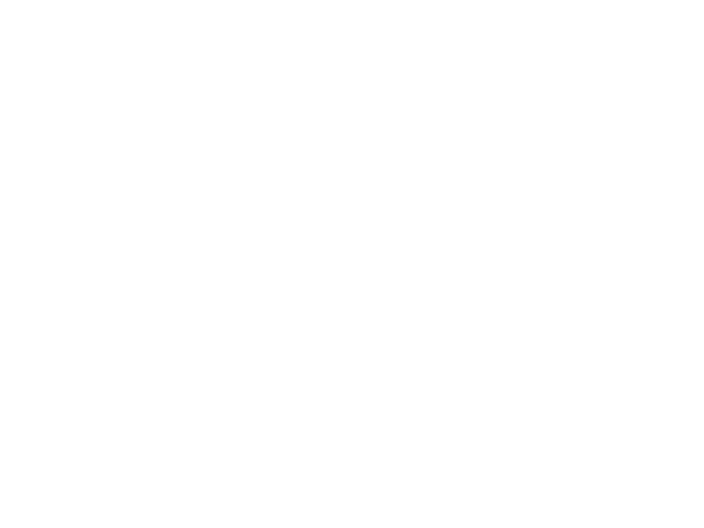

In [80]:
# 3D Plot
fig = pylab.figure(14)
ax = Axes3D(fig)
size_vertex_plot = 100
ax.scatter(PC[:,0], PC[:,1], PC[:,2], s=60*np.ones(27), c=C)
pyplot.show()

## 2.6 PCA as a data generation tool [Bonus]
<hr>


<IPython.core.display.Javascript object>


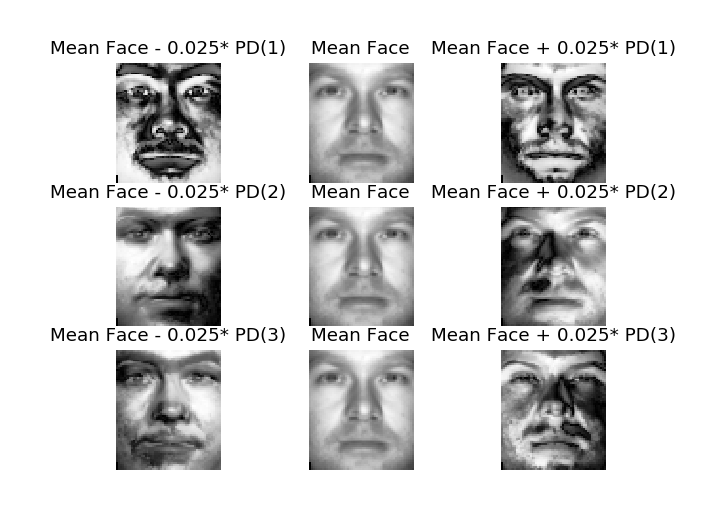

(-0.5, 54.5, 62.5, -0.5)

In [82]:
# Generate new faces
X = scipy.io.loadmat('data/pca02_yale_faces.mat')['X']
meanX = np.mean(X,axis=0) 
PD = U.T

plt.figure(15)
k = 0; new_face = meanX - 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(331).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face - 0.025* PD(1)')
plt.axis('off')
k = 0; new_face = meanX - 0.0* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(332).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face')
plt.axis('off')
k = 0; new_face = meanX + 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(333).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face + 0.025* PD(1)')
plt.axis('off')
k = 1; new_face = meanX - 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(334).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face - 0.025* PD(2)')
plt.axis('off')
k = 1; new_face = meanX - 0.0* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(335).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face')
plt.axis('off')
k = 1; new_face = meanX + 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(336).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face + 0.025* PD(2)')
plt.axis('off')
k = 2; new_face = meanX - 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(337).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face - 0.025* PD(3)')
plt.axis('off')
k = 2; new_face = meanX - 0.0* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(338).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face')
plt.axis('off')
k = 2; new_face = meanX + 0.025* s[k]* PD[k,:]
rotated_img = scipy.ndimage.rotate(np.reshape(np.abs(new_face),[Nx,Ny]), -90)
plt.subplot(339).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.title('Mean Face + 0.025* PD(3)')
plt.axis('off')
